The line has a swallow slope(m<=1)


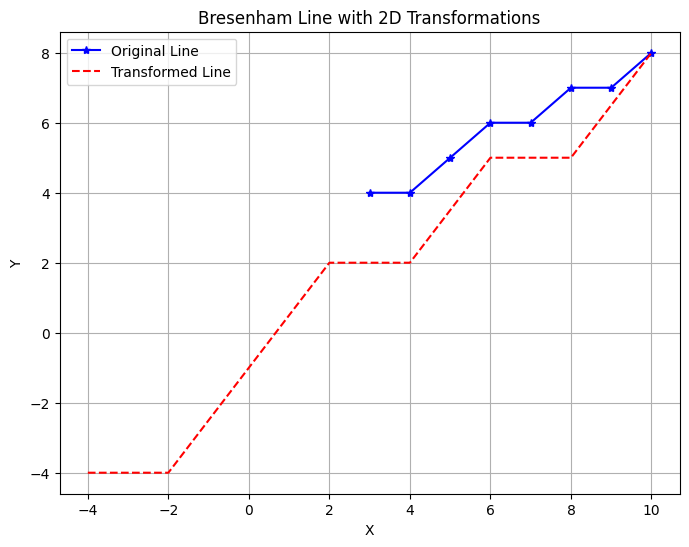

In [7]:
import matplotlib.pyplot as plt
import numpy as np
x0= int(input("enter value of x0"))
y0= int(input("enter value of y0"))
x1= int(input("enter value of x1"))
y1= int(input("enter value of y1"))
sx= int(input('Enter sx: '))
sy= int(input('Enter sy: '))
def BLA(x0,y0,x1,y1):
    diffx = abs(x1- x0)
    diffy = abs(y1 -y0)

    if (diffx >= diffy):
        print("The line has a swallow slope(m<=1)")
    else :
        print("The line has a steep slope(m>1)")    

    if (x1>x0):
        sx = 1
    else:
        sx = -1
    if (y1 > y0):
        sy = 1
    else:
        sy = -1  

    if (diffx >= diffy):
        po = 2* diffy - diffx  
    

    else:
        po = 2* diffx - diffy   
    pointsx =[]  
    pointsy =[]      
    for i in range(max(diffx,diffy)):
        if diffx >= diffy: 
            
                x0 += sx
                if po >= 0:
                    y0 += sy
                    po += 2 * diffy - 2 * diffx
                else:
                    po += 2 * diffy
                pointsx.append(x0)
                pointsy.append(y0)
        else:  
        
                y0 += sy
                if po >= 0:
                    x0 += sx
                    po += 2 * diffx - 2 * diffy
                else:
                    po += 2 * diffx
                pointsx.append(x0)
                pointsy.append(y0)
    return pointsx,pointsy
pointsx,pointsy=BLA(x0,y0,x1,y1)

T1 = np.array([[1,0,x1],[0,1,y1],[0,0,1]])#inverse translation matrix
S = np.array([[sx,0,0],[0,sy,0],[0,0,1]]) #scaling matrix
T = np.array([[1,0,-x1],[0,1,-y1],[0,0,1]]) #translation matrix

CM = T1 @ S @ T
P = np.vstack([pointsx,pointsy,np.ones_like(pointsx)])

TM = CM @ P
plt.figure(figsize=(8, 6))
plt.plot( pointsx,pointsy,marker='*',color='blue', linestyle='-', label='Original Line')
plt.plot(TM[0],TM[1], color='red', linestyle='--', label='Transformed Line')

plt.title("Bresenham Line with 2D Transformations")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


The line has a steep slope(m>1)


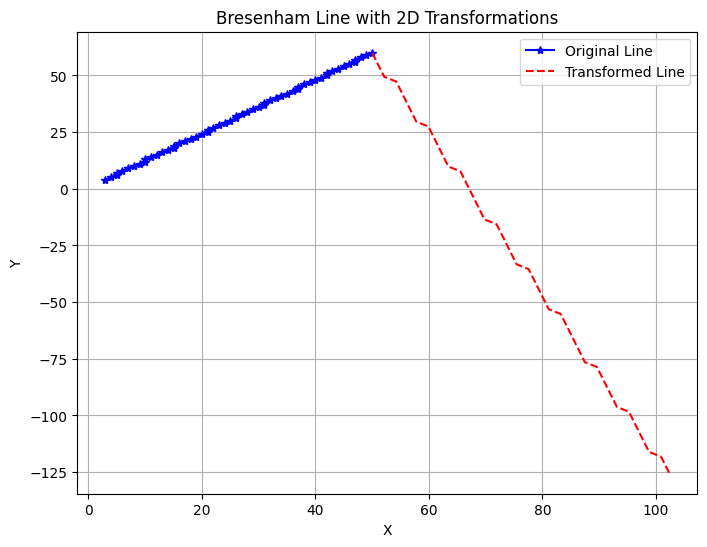

In [12]:
import matplotlib.pyplot as plt
import numpy as np
x0= int(input("enter value of x0"))
y0= int(input("enter value of y0"))
x1= int(input("enter value of x1"))
y1= int(input("enter value of y1"))
sx= int(input('Enter sx: '))
sy= int(input('Enter sy: '))
theta= np.radians(int(input('Enter angle to rotate: ')))
def BLA(x0,y0,x1,y1):
    diffx = abs(x1- x0)
    diffy = abs(y1 -y0)

    if (diffx >= diffy):
        print("The line has a swallow slope(m<=1)")
    else :
        print("The line has a steep slope(m>1)")    

    if (x1>x0):
        sx = 1
    else:
        sx = -1
    if (y1 > y0):
        sy = 1
    else:
        sy = -1  

    if (diffx >= diffy):
        po = 2* diffy - diffx  
    

    else:
        po = 2* diffx - diffy   
    pointsx =[]  
    pointsy =[]      
    for i in range(max(diffx,diffy)):
        if diffx >= diffy: 
            
                x0 += sx
                if po >= 0:
                    y0 += sy
                    po += 2 * diffy - 2 * diffx
                else:
                    po += 2 * diffy
                pointsx.append(x0)
                pointsy.append(y0)
        else:  
        
                y0 += sy
                if po >= 0:
                    x0 += sx
                    po += 2 * diffx - 2 * diffy
                else:
                    po += 2 * diffx
                pointsx.append(x0)
                pointsy.append(y0)
    return pointsx,pointsy
pointsx,pointsy=BLA(x0,y0,x1,y1)

T1 = np.array([[1,0,x1],[0,1,y1],[0,0,1]])#inverse translation matrix
S = np.array([[sx,0,0],[0,sy,0],[0,0,1]]) #scaling matrix
T = np.array([[1,0,-x1],[0,1,-y1],[0,0,1]]) #translation matrix


rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],[np.sin(theta), np.cos(theta), 0],[0, 0, 1]]) #rotation matrix

CM = T1 @ rotation_matrix @ S @ T 
P = np.vstack([pointsx,pointsy,np.ones_like(pointsx)])# for stack

TM = CM @ P
plt.figure(figsize=(8, 6))
plt.plot( pointsx,pointsy,marker='*',color='blue', linestyle='-', label='Original Line')
plt.plot(TM[0],TM[1], color='red', linestyle='--', label='Transformed Line')

plt.title("Bresenham Line with 2D Transformations")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


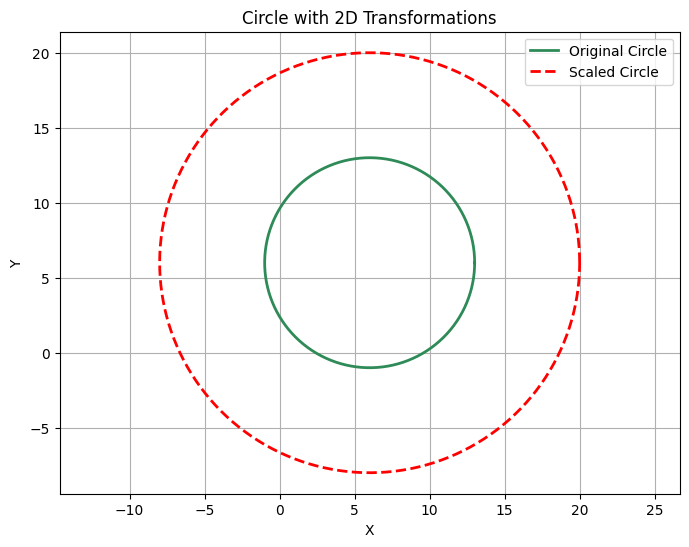

In [2]:
import matplotlib.pyplot as plt
import numpy as np

sx = float(input("Enter the scaling factor for x: "))
sy = float(input("Enter the scaling factor for y: "))

def generate_circle_points(xc, yc, r):
    theta = np.linspace(0, 2 * np.pi, 500)  
    x = xc + r * np.cos(theta)
    y = yc + r * np.sin(theta)
    return x, y

xc = int(input("Enter x-coordinate of circle center: "))
yc = int(input("Enter y-coordinate of circle center: "))
r = int(input("Enter radius of the circle: "))

xes, yes = generate_circle_points(xc, yc, r)

T1 = np.array([[1, 0, -xc], [0, 1, -yc], [0, 0, 1]])  
S = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])     
T2 = np.array([[1, 0, xc], [0, 1, yc], [0, 0, 1]]) 

CM = T2 @ S @ T1

points = np.vstack((xes, yes, np.ones_like(xes))) 
transformed_points = CM @ points                 

transformed_xes, transformed_yes = transformed_points[0], transformed_points[1]

plt.figure(figsize=(8, 6))
plt.plot(xes, yes, color='seagreen', label='Original Circle', linewidth=2) 
plt.plot(transformed_xes, transformed_yes, color='red', linestyle='--', label='Scaled Circle', linewidth=2) 

plt.title("Circle with 2D Transformations")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')  
plt.legend()
plt.grid(True)
plt.show()
